# Application of SVD in image processing

## Introduction to SVD

Matrix factorization is a very important part of linear algebra. By decomposing the original matrix into matrices of different properties, the matrix factorization can not only show the potential attributes of the original matrix, but also help to implement various algorithms efficiently. Among all kinds of matrix factorizations, SVD (Singular Value Decomposition) is one of the most common used factorizaitons. SVD decomposes an aribitrary matrix into two orthogonal matrices and one diagonal matrix, with each of them has a specific mathematical meaning. We will elaborate on this process in the following section.

Definition of Singular Value: <br>
Define $A \in C_r^{(m \times n)}$, $A^HA$ has eigenvalues $$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_r \geq \lambda_{r+1} = \lambda_n = 0$$
Then we say $\sigma_i = \sqrt{\lambda_i} (i=1,2,\cdots,r)$ are singular values of the matrix $A$

Assume that $A \in C_r^{(m \times n)}$, there exists matrix of rank m $U$ and matrix of rank n $v$ such that $$ A = U\Sigma V^H$$
$\Sigma$ is the diagonal matrix of $A$'s singular values. $U$'s column are $A$'s left singular vectors and $V$'s columns are $A$'s right singular vectors.

### Proof of SVD

Define $A \in C_r^{(m \times n)}$, $$V_1 = (v_1 v_2 \cdots v_r)$$
is a set of normalized orthogonal vectors corresponding to $A^HA$'s $r$ eigenvalues $\sigma_i^2$, which satisfies $$A^HAv_i = \sigma_i^2 v_i (i=1,2,\cdots,r)$$
left multiplies $v_i^H$, $$v_i^HA^HAv_i = ||Av_i||^2 = \sigma_i^2$$
using square root on both sides, we get $||Av_i|| = \sigma_i$ <br>
And $$Y_1=(y_1,y)2,\cdots,y_r)=AV_1=(Av_1,Av_2,\cdots,Av_r)$$
$$Y_1^HY_1 = V_1^HA^HAV_1 = \left(\begin{matrix}
   \sigma_1^2 && 0 \\
   &\ddots& \\
   0 && \sigma_r^2
  \end{matrix}\right) = D$$
Hence, $y_i(i=1,2,\cdots,r)$ is a set of orthogonal vectors and they have lengths $\sqrt(\sigma_i^2) = \sigma_i$. We can the calculate the unit vectors $$U_1 = Y_1D^{-1}$$
and $$AV_1 = U_1D$$
Now, we only need to combine $U_1$ and $AA^H$'s eigenvectors of trivial eigenvalues to form a orthogonal matrix $$U = (U_1\space\space U_2)$$
And expand $V_1$ to orthogonal matrix $$V = (V_1 \space\space V_2)$$
And then set $$\Sigma =  \left(\begin{matrix}
   D & 0 \\
   0 & O
  \end{matrix}\right)$$
Finally,$$AV = U\Sigma$$ $$A = U\Sigma V^H$$

### Meaning of SVD

For any matrix  $A \in C_r^{(m \times n)}$, it has 4 vector space: <br>
>1. (Row space): vector space formed by all row vectors <br>
2. (Column space): vector space formed by all column vectors (Range) <br>
3. (Null space): vector space formed by vectors that satisfy $Ax=0$ <br>
4. (Left null space): vector space formed by vectors that satisfy $A^Hx=0$

From fundamental theorem of linear algebra, This four vector space have the following relationships:
> the dimension of row space and vectors space are $r$ <br>
the dimension of null space is $n - r$ <br>
the left null space has dimension $m-r$ <br>
the row space and null space are orthogonal complement <br>
the column space and left null space are orthogonal complement <br>

The SVD relates 4 vector space elegantly. First of all, $A$ and $A^HA$ have the same null space, because $A^HA$'s null space and eigen space formed by its zero eigenvalues are the same. Therefore, the $r+1th$ and $nth$ column of $V$ constitutes a set of unit orthogonal basis of the null space of $A$. <br>
In terms of the orthogonality of $V$, the first to $rth$ columns of V forms a orthogonal complement vector space to the vector space of $r+1th$ to $nth$ columns of itself. By the uniqueness of orthogonal complement property and fundamental theorem of linear algebra, the first to $r$th columns of $V$ constitute a unit orthogonal basis of $A$'s row space. <br>
In the same sense, the first to the $rth$ columns of $U$ form a vector space that is a unit orthogonal basis of $A$'s column space; the $r+1th$ to $mth$ columns of U forms a unit orthogonal basis of the left null space of A. What's more, according to SVD theorem, the first $rth$ columns of $U$ and those of $V$ (assume as $U_1$ and $V_1$) has the following relathionship: $$AV_1 = DU_1 (D = diag(\sigma_1, \sigma_2, \cdots, \sigma_r))$$
Hence, SVD not only generates 4 unit orthogonal bases of 4 vectors space of the original matrix, but also relates its row space and column space through a simple linear transformation.

## SVD in Image Processing

SVD has important usages in matrix calculations, text mining and many other fields. I will go through its usage in image processing, especially in the compression of images and the representation of image features

### SVD and Compression of Images.

Digital images could be considered as a 2-dimension matrix in which every entry represents the grayness of a pixel in the image. With the development of the related technologies, modern digital cameras are able to photograph a picture of millions of pixels. As a result, the matrix of the image has a relative large size, even huge. But due to the large portion of areas that have similar colors, which means the pixels are highly correlated in those areas, the image as certain certain level of redundancy of information in its corresponding matrix. <br>
<br>
Such redundancy can be measured by the rank of the matrix: A high rank matrix as lower correlation between columns and a low rank matrix has higher correlation bewteen columns. The picture below is transformed from a vector $u = [0, 0.1, 0.2, \cdots, 0.9]$ right multiplies a vector $v^H$ with 10 entries all equal to 1. <br>
<div align=center><img width = '150' height ='150' src =blog_imgs/black.png></div> <br>
The matrix of the image is 
$$\left(\begin{matrix}
   0 & 0 & \cdots & 0 \\
   0.1 & 0.1 & \cdots & 0.1 \\
   0.2 & 0.2 & \cdots & 0.2 \\
   \vdots & \vdots && \vdots \\
   0.9 & 0.9 & \cdots & 0.9
  \end{matrix}\right)$$
Apparently, the rank of this matrix is 1 because every row of it can be achieved by another row multiplying a number. Hence, We just need $u,v$ vectors with 20 numbers to store all the information of this matrix. The 80 left entries are redundant in this case. The compression ratio is $$CR = \frac{20}{100} = 0.2$$
Of course, this is an extreme case; the more general problem is like this: for a matrix for an image, how do we acquire the best similar matrix of a low rank? SVD gives an answer to this question. <br>
<br>
We can write SVD in the form of outer product expansion:
$$A = U\Sigma V^H = (u_1,u_2,\cdots,u_m) \left(\begin{matrix}
   \sigma_1 &&& o \\
    &\ddots&&\\
    &&\sigma_r&\\
   o &&& o
  \end{matrix}\right) \left(\begin{matrix}
  v_1^H\\
  v_2^H\\
  \vdots\\
  v_n^H\\
  \end{matrix}\right) =\sum_{i=1}^r\sigma_i u_i v_i^H$$
 <br>
After we write the product in sum, SVD is only left with $r$ nonzero singular values and corresponding outer products with $u_i, v_i$. The rest of the outer products are redundant data, which contribute nothing to the construction of A. We can easily discover that, there is a nonzero eigenvalue of the above matrix. <br>
<br>
Naturally, we can perform SVD on any image, remove those vectors of its zero singular values and get a similar matrix with a lower rank. However, because of the existence of noise and the complexity of the image content, images in reality are always full rank. In other words, the number of nonzero singular values equal the number of columns or rows. Simply removing redundant singular vectors does not help in compression.
<br><br>
Though highly correlated areas in images are linearly indepedent in definition rigorously, they can be seen as approximately linear dependent. This truth would cause the existence of extremely small singular values because the linear independence caused by the small differences between pixels does not matter in the whole image. Therefore, we can remove the small $\sigma_i$ in the outer product expansion formula to get a rank of $r-k$ matrix. This matrix is viewed as the low rak approximation. Here comes the question: how do we know that it is a good approximation?
<br>

Define $A \in C_r^{(m \times n)}$, the optimization problem  $$O = min||A-A_1||_F \space s.t. \space  rank(A_1) = 1$$
takes its minimum when $A=\sigma_1 u_1 v_1^H$, and $\sigma_1$ is the biggest singular value of $A$, while $u_1,v_1$ are its left and right singular vectors. $||\cdot||_F$ is the Frobenius norm.

### <div align=center>---------------------------------------------------------------------------Simple Proof---------------------------------------------------------------------------------------</div>

We can take the SVD of $A$ as $U\Sigma V^H$ and take it into the object funciton: $$||A - A_1||_F = ||U\Sigma V^H - A_1||_F$$
Due to Forbenius norm's unitary invariance, we get $$ ||U\Sigma V^H - A_1||_F = ||\Sigma - U^HA_1V||_F$$
As $A_1$ has rank 1, $U^HA_1V$ can be represented as $\alpha xy^H$, of which $x,y$ are the unit vectors in $C^M,C^N$. Hence, $$||U\Sigma V^H - A_1||_F = ||\Sigma-\alpha xy^H||_F$$
With $||X||_F^2 = tr(X^HX)$, and $tr(XY) = tr(YX)$, we turn the problem into solving for the trace of the matrix instead of the Forbenius norm. <br>
$$||\Sigma - \alpha xy^H||_F^2$$ $$=tr[(\Sigma-\alpha xy^H)^H(\Sigma - \alpha xy^H)]$$ $$=tr(\Sigma^H\Sigma - \Sigma^H-\alpha xy^H -\alpha xy^H\Sigma + \alpha^Hyy^H)$$
$$=tr(\Sigma^H\Sigma + \alpha^2 - 2\alpha tr[\Sigma^H Re(xy^H)])$$ $$=||\Sigma||_F^2 + \alpha^2 - 2\alpha\sum_{i=1}^r\sigma_iRe(x_iy_i^*)$$
And we have $$\sum_{i=1}^r\sigma_iRe(x_iy_i^*) \leq  \sum_{i=1}^r\sigma_i|x_iy_i^*| \leq \sum_{i=1}^r\sigma_i|x_i||y_i^*|\leq \sigma_1\sum_{i=1}^r|x_i||y_i^*|=\sigma_1(\tilde{x},\tilde{y})$$
while $\tilde{x} = (|x_1|,|x_2|,\cdots,|x_r|), \tilde{y}=(|y_1|,|y_2|,\cdots,|y_r|$, and $(\cdot,\cdot)$ is the inner product of vectors. According to Cauchy-Schwartz inequality, we have $$\sigma_1(\tilde{x},\tilde{y}) \leq \sigma_1|\tilde{X}||\tilde{y}| \leq \sigma|x||y| = \sigma_1$$.
Above all, the lower bound of $||A-A_1||_F^2$ = $$\Sigma^H\Sigma + \alpha^2 - 2\alpha tr[\Sigma^H Re(x_iy_i^*)]$$
$$\geq ||\Sigma||_F^2 + \alpha^2 - 2\alpha\sigma_1$$ $$=||\Sigma||_F^2 + (\alpha-\sigma_1)^2 - \sigma_1^2$$
When $\alpha = \sigma_1$, this lower bound gets its minimum $||\Sigma||_F^2 - \sigma_1^2$. By the way, $x,y$ is equal to $e_1 = (1,0,\cdots,0)^T$. Now we have $$A_1 = \alpha Uxy^HV^H=\alpha u_1v_1^H$$
### <div align=center>-------------------------------------------------------------------------------Done--------------------------------------------------------------------------------------------</div>



In application, we can get a k-rank approximation of $A$ by an iterative 1-rank approximation greedy algorithm: <br>
> 1) get the best 1-rank approximation of matrix $A$ as $A_1$ <br>
2) get the difference matrix $E_1 = A - A_1$ <br>
3) get the best 1-rank approximation of $E_1$ as $A_2$ <br>
4) get the difference matrix $E_2 = E_1 - A_2$ <br>
5) iteratively approach the k times approximation till getting the result $\hat{A} = \sum_{i=1}^n A_i$

Lawson and Hanson proved that this algorithm will return a best k-rank approximation, which is the sum of the first $kth$ outer products of SVD. Because $E_1 = A - \sigma_1 u_1 v_1^H = \sum_{i=1}^r \sigma_k u_k v_k^H$, the second iteration will return a 1-rank approximation of A_2 as $\sigma_2 u_2 v_2^H$, and kth iteration as $A_k = \sigma_k u_k v_k^H$, finally $$\hat{A} =\sum_{i=1}^K \sigma_k u_k v_k^H $$
Above all, the first $kth$ outer products of SVD outer product expansion is its best k-rank approximation.

## Example

<div align=center><img width = '150' height ='150' src=blog_imgs/example.png></div> <br>
<div align=center><img width = '250' height ='250' src=blog_imgs/example2.png></div> <br>

### SVD and Image representation

SVD has its more imporatant roles in image representation, which means picking basis vectors for images so that images can show various useful features. For example, Discrete Fourier Transform is one of the common image representation methods. SVD is also a powerful image representation method, which is also called Principle Componenet Analysis - PCA.

Suppose that we have 10 2-dimension data as following:

![blog/imgs/data](blog_imgs/data.png)

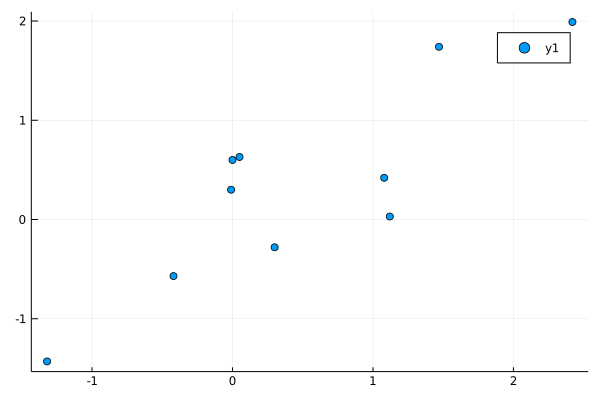

In [5]:
using Plots
a = [(-0.01,0.3), (0.3,-0.28), (-1.32,-1.43), (-0.42,-0.57), (0,0.6), (1.08,0.42), (2.42,1.99), (1.12,0.03), (0.05,0.63), (1.47,1.74)]
xs = [i[1] for i in a]
ys = [i[2] for i in a]
gr()
plot(xs, ys, seriestype = :scatter)

From the plot, we can see that these points center around a line that passes the origin. If x and y mean two physics measurement at the same time, then we might believe these two variables have linear relationship. The problem is, how should we calculate this line? More generally, how to find directions of the trend of changes of a set of n-dimension data with mean zero?

First of all, assume the sample $X \in R^{m\times n}$, its $i(1,2,\cdots,n)th$ column $x_i$ represents the $ith$ m-dimension sample. In total, there are n samples with mean zero:
$$X = (x_1,x_2,\cdots,x_n), x_i \in R^m$$ $$\sum_{i=1}^n x_i = 0$$
Projecting these n samples onto some unit vector $u$, if the directions of $u$ matches the direction of the most violent change, then the projected samples have length along the the direction of $u$, $|u^TX|^2$, the maximum of all times. Hence, we have the following optimization problem: $$O = max(uXX^Tu) \space s.t. \space u^tu = 1$$
Since $XX^T$ is a symmetric matrix, we can do diagonalization: $XX^T = Q^T\Lambda Q$. $$u^TXX^Tu=u^TQ^T\Lambda Qu = y^T \Lambda y$$ with $y^Ty=1$ as orthogonal linear transformations preserve the inner product. Expanding the above equation, we have $$y^T\Lambda y = \sum_{i=1}^n y_i^2\lambda_i \leq \lambda_1\sum_{i=1}^n y_i^2 = \lambda_1$$

$\lambda_1$ is the largest eigenvalue of $XX^T$ (Assume $\Lambda=diag(\lambda_1,\lambda_2,\cdots,\lambda_n)$ has its eigenvalues in the diagonal in descending order), when $y=(1,0,0,\cdots,0)$. Now $u$ is the first column of the eigenvector matrix $Q$, which is the eigenvector of $\lambda_1$. The above property is the condition of Rayleigh-Ritz theorem in $R$. In other words, when $u$ is left singular vector of the largest singular value of the matrix $X$, the sample data has its biggest sum of squares of projections on the direction of $u$, which is the square of the largest singular value. Similarly, if we want to find the $k(k=1,2,\cdots,n)$ number of the most violent change of sample data, according to Rayleigh-Ritz theorem, we should find the k number of left singular vectors of the matrix $X$.

Since those k number of orthogonal vectors show the major trend of the data well, they can be a set of image representation basis, which is also called the Principle Component of the sample data. Suppose $k=rank(X)$, we can use SVD to show the principle component ($u_1,u_2,\cdots,u_k$) of data $x_j$: $$X = (u_1,u_2,\cdots,u_k)\Sigma V^T = (u_1,u_2,\cdots,u_k)C$$
$$\Leftarrow \Rightarrow (x_1,x_2,\cdots,x_k) = (u_1,u_2,\cdots,u_k) \left(\begin{matrix}
   c_{11} &\cdots& c_{1n} \\
   \vdots &\ddots&\vdots\\
   c_{n1} &\cdots& c_{nn}
  \end{matrix}\right)$$
$$\Leftarrow \Rightarrow x_j = \sum_{i=1}^k u_ic_{ij} (j=1,2,\cdots,n)$$
In the real world, the principle component number $k$ is always smaller than the original dimension of data $X$, so we acquire a more tight image reprensentaion through SVD. In the chart above, we can get the first principle component is $u_1=(-0.74, -0.67)^T$ with singular value 4.63. And the projected sample data vector length has square root 1.38. 

In image processing, especially the face recognition, sample matrix $X$ has each of its column as a column of image. Suppose the image is of size (256 $\times$ 256) pixels, the dimension of this image is 65536. As the increase of sample data, such a high dimension posts a big challenge to data storage and the computing resources. However, comparing to the high dimension of images, the total number of images is much smaller. Assume that a face recognition system has 50 users and each user has 10 sample images, we will have 500 images in database. The sample matrix of these data is very narrow, which is $X \in R^{65536\times 500}$. Based on the property of singular value decomposition, this matrix has at most 500 non-zero singular values, meaning that only 500 principle components have change of directions larger than zero while in other directions, all samples remain undeviated.

Therefore, we can assume all 50 users are distributed in a relatively lower dimension of vector space. This space is consists of a basis of 500 principle components. After we read a image, we can project it onto this low dimension space and use a certain algorithm to recognize it.

Surprisingly, if we recover these principle components back to an image, these images resemble the basic information and attributes of a human face. Hence, these faces are called "Eigenface."

# Reference

1. Lawson, C.L. and R.J. Hanson, Solving least squares problems. Vol. 15. 1995: SIAM.